<a href="https://colab.research.google.com/github/medbouzid/INSE6220/blob/main/dry_bean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [3]:
#from bioinfokit.visuz import cluster

## **Upload File**

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/medbouzid/INSE6220/main/Dry_Bean_Dataset.csv')
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

### **Classes**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
df['Class'] = labelencoder.fit_transform(df['Class'])

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
y = df['Class']
target = df['Class'].to_numpy()

In [7]:
y.value_counts()

3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: Class, dtype: int64

### **Features**

Data Matrix

In [8]:
X = df.iloc[:,0:16]
X.head(10)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   
5  30279    634.927       212.560556       181.510182      1.171067   
6  30477    670.033       211.050155       184.039050      1.146768   
7  30519    629.727       212.996755       182.737204      1.165591   
8  30685    635.681       213.534145       183.157146      1.165852   
9  30834    631.934       217.227813       180.897469      1.200834   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5      0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6      0.489478       30970     196.988633  0.762402  0.984081   0.853080   
7      0.513760       30847     197.124320  0.770682  0.989367   0.967109   
8      0.514081       31044     197.659696  0.771561  0.988436   0.954240   
9      0.553642       31120     198.139012  0.783683  0.990810   0.970278   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.003147      0.834222      0.998724  
1     0.953861      0.006979      0.003564      0.909851      0.998430  
2     0.908774      0.007244      0.003048      0.825871      0.999066  
3     0.928329      0.007017      0.003215      0.861794      0.994199  
4     0.970516      0.006697      0.003665      0.941900      0.999166  
5     0.923726      0.007020      0.003153      0.853270      0.999236  
6     0.933374      0.006925      0.003242      0.871186      0.999049  
7     0.925480      0.006979      0.003158      0.856514      0.998345  
8     0.925658      0.006959      0.003152      0.856844      0.998953  
9     0.912125      0.007045      0.003008      0.831973      0.999061

In [9]:
df.describe().transpose()

count          mean           std           min  \
Area             13543.0  53048.460385  29392.438324  20420.000000   
Perimeter        13543.0    854.993406    214.722684    524.736000   
MajorAxisLength  13543.0    319.895602     85.809260    183.601165   
MinorAxisLength  13543.0    202.365321     45.051632    122.512653   
AspectRation     13543.0      1.581075      0.245245      1.024868   
Eccentricity     13543.0      0.750315      0.091858      0.218951   
ConvexArea       13543.0  53767.986709  29844.248525  20684.000000   
EquivDiameter    13543.0    253.034094     59.307709    161.243764   
Extent           13543.0      0.749829      0.048939      0.555315   
Solidity         13543.0      0.987152      0.004650      0.919246   
roundness        13543.0      0.873671      0.059393      0.489618   
Compactness      13543.0      0.800352      0.061464      0.640577   
ShapeFactor1     13543.0      0.006561      0.001130      0.002778   
ShapeFactor2     13543.0      0.001719      0.000595      0.000564   
ShapeFactor3     13543.0      0.644341      0.098653      0.410339   
ShapeFactor4     13543.0      0.995078      0.004347      0.947687   
Class            13543.0      3.530311      1.832994      0.000000   

                          25%           50%           75%            max  
Area             36282.500000  44580.000000  61382.000000  254616.000000  
Perimeter          703.230000    793.896000    977.146500    1985.370000  
MajorAxisLength    253.086806    296.404589    376.312489     738.860154  
MinorAxisLength    175.886357    192.491117    217.245403     460.198497  
AspectRation         1.430662      1.549860      1.703916       2.430306  
Eccentricity         0.715144      0.763997      0.809671       0.911423  
ConvexArea       36673.000000  45122.000000  62360.000000  263261.000000  
EquivDiameter      214.933277    238.245711    279.560351     569.374358  
Extent               0.718735      0.759903      0.786849       0.866195  
Solidity             0.985678      0.988288      0.990019       0.994677  
roundness            0.833410      0.883490      0.917031       0.990685  
Compactness          0.763228      0.801514      0.834470       0.987303  
ShapeFactor1         0.005893      0.006643      0.007270       0.010451  
ShapeFactor2         0.001158      0.001700      0.002173       0.003665  
ShapeFactor3         0.582517      0.642424      0.696341       0.974767  
ShapeFactor4         0.993720      0.996393      0.997891       0.999733  
Class                2.000000      3.000000      5.000000       6.000000

Notice that the data is not standardizd. So we need to standarize it.

In [10]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [11]:
df.describe().transpose()

count          mean       std        min       25%  \
Area             13543.0  1.111801e-15  1.000037  -1.110138 -0.570439   
Perimeter        13543.0  4.305383e-16  1.000037  -1.538122 -0.706814   
MajorAxisLength  13543.0 -4.798970e-17  1.000037  -1.588400 -0.778602   
MinorAxisLength  13543.0  6.267764e-16  1.000037  -1.772535 -0.587769   
AspectRation     13543.0  2.930598e-16  1.000037  -2.268048 -0.613341   
Eccentricity     13543.0 -1.298722e-15  1.000037  -5.784847 -0.382902   
ConvexArea       13543.0  1.596801e-16  1.000037  -1.108596 -0.572828   
EquivDiameter    13543.0 -1.230410e-15  1.000037  -1.547754 -0.642450   
Extent           13543.0  1.457472e-15  1.000037  -3.974761 -0.635388   
Solidity         13543.0  2.275773e-15  1.000037 -14.603724 -0.316922   
roundness        13543.0  1.323250e-15  1.000037  -6.466531 -0.677914   
Compactness      13543.0 -1.174989e-15  1.000037  -2.599580 -0.604014   
ShapeFactor1     13543.0  4.994364e-16  1.000037  -3.349169 -0.591475   
ShapeFactor2     13543.0 -4.152023e-16  1.000037  -1.939805 -0.941786   
ShapeFactor3     13543.0 -1.147215e-15  1.000037  -2.372061 -0.626702   
ShapeFactor4     13543.0 -2.756582e-14  1.000037 -10.903004 -0.312561   

                      50%       75%       max  
Area            -0.288128  0.283537  6.858056  
Perimeter       -0.284552  0.568909  5.264550  
MajorAxisLength -0.273769  0.657493  4.882690  
MinorAxisLength -0.219183  0.330302  5.723271  
AspectRation    -0.127285  0.500908  3.462912  
Eccentricity     0.148956  0.646201  1.753949  
ConvexArea      -0.289714  0.287906  7.019803  
EquivDiameter   -0.249359  0.447281  5.334078  
Extent           0.205848  0.756462  2.377834  
Solidity         0.244226  0.616531  1.618441  
roundness        0.165318  0.730070  1.970233  
Compactness      0.018901  0.555110  3.041733  
ShapeFactor1     0.072690  0.627774  3.443673  
ShapeFactor2    -0.031597  0.761720  3.267675  
ShapeFactor3    -0.019430  0.527115  3.349501  
ShapeFactor4     0.302533  0.647145  1.070731

Notice that the data is now standardizd.

**Observations and variables**

In [12]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

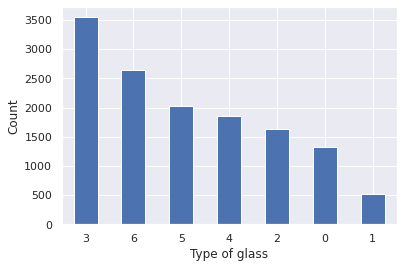

In [13]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Type of glass')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

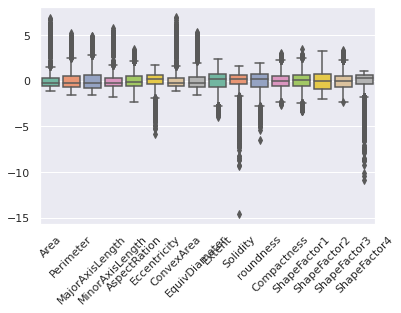

In [14]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

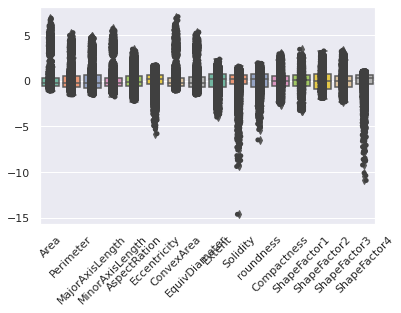

In [15]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [16]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count  1.354300e+04  1.354300e+04     1.354300e+04     1.354300e+04   
mean   1.111801e-15  4.305383e-16    -4.798970e-17     6.267764e-16   
std    1.000037e+00  1.000037e+00     1.000037e+00     1.000037e+00   
min   -1.110138e+00 -1.538122e+00    -1.588400e+00    -1.772535e+00   
25%   -5.704385e-01 -7.068140e-01    -7.786020e-01    -5.877687e-01   
50%   -2.881276e-01 -2.845515e-01    -2.737686e-01    -2.191834e-01   
75%    2.835371e-01  5.689087e-01     6.574928e-01     3.303017e-01   
max    6.858056e+00  5.264550e+00     4.882690e+00     5.723271e+00   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter        Extent  \
count  1.354300e+04  1.354300e+04  1.354300e+04   1.354300e+04  1.354300e+04   
mean   2.930598e-16 -1.298722e-15  1.596801e-16  -1.230410e-15  1.457472e-15   
std    1.000037e+00  1.000037e+00  1.000037e+00   1.000037e+00  1.000037e+00   
min   -2.268048e+00 -5.784847e+00 -1.108596e+00  -1.547754e+00 -3.974761e+00   
25%   -6.133411e-01 -3.829016e-01 -5.728279e-01  -6.424498e-01 -6.353885e-01   
50%   -1.272846e-01  1.489557e-01 -2.897143e-01  -2.493593e-01  2.058485e-01   
75%    5.009079e-01  6.462006e-01  2.879057e-01   4.472814e-01  7.564623e-01   
max    3.462912e+00  1.753949e+00  7.019803e+00   5.334078e+00  2.377834e+00   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  1.354300e+04  1.354300e+04  1.354300e+04  1.354300e+04  1.354300e+04   
mean   2.275773e-15  1.323250e-15 -1.174989e-15  4.994364e-16 -4.152023e-16   
std    1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00   
min   -1.460372e+01 -6.466531e+00 -2.599580e+00 -3.349169e+00 -1.939805e+00   
25%   -3.169215e-01 -6.779143e-01 -6.040142e-01 -5.914750e-01 -9.417864e-01   
50%    2.442265e-01  1.653179e-01  1.890052e-02  7.268999e-02 -3.159673e-02   
75%    6.165309e-01  7.300695e-01  5.551101e-01  6.277737e-01  7.617195e-01   
max    1.618441e+00  1.970233e+00  3.041733e+00  3.443673e+00  3.267675e+00   

       ShapeFactor3  ShapeFactor4  
count  1.354300e+04  1.354300e+04  
mean  -1.147215e-15 -2.756582e-14  
std    1.000037e+00  1.000037e+00  
min   -2.372061e+00 -1.090300e+01  
25%   -6.267020e-01 -3.125605e-01  
50%   -1.942988e-02  3.025331e-01  
75%    5.271149e-01  6.471448e-01  
max    3.349501e+00  1.070731e+00

### Pair Plot

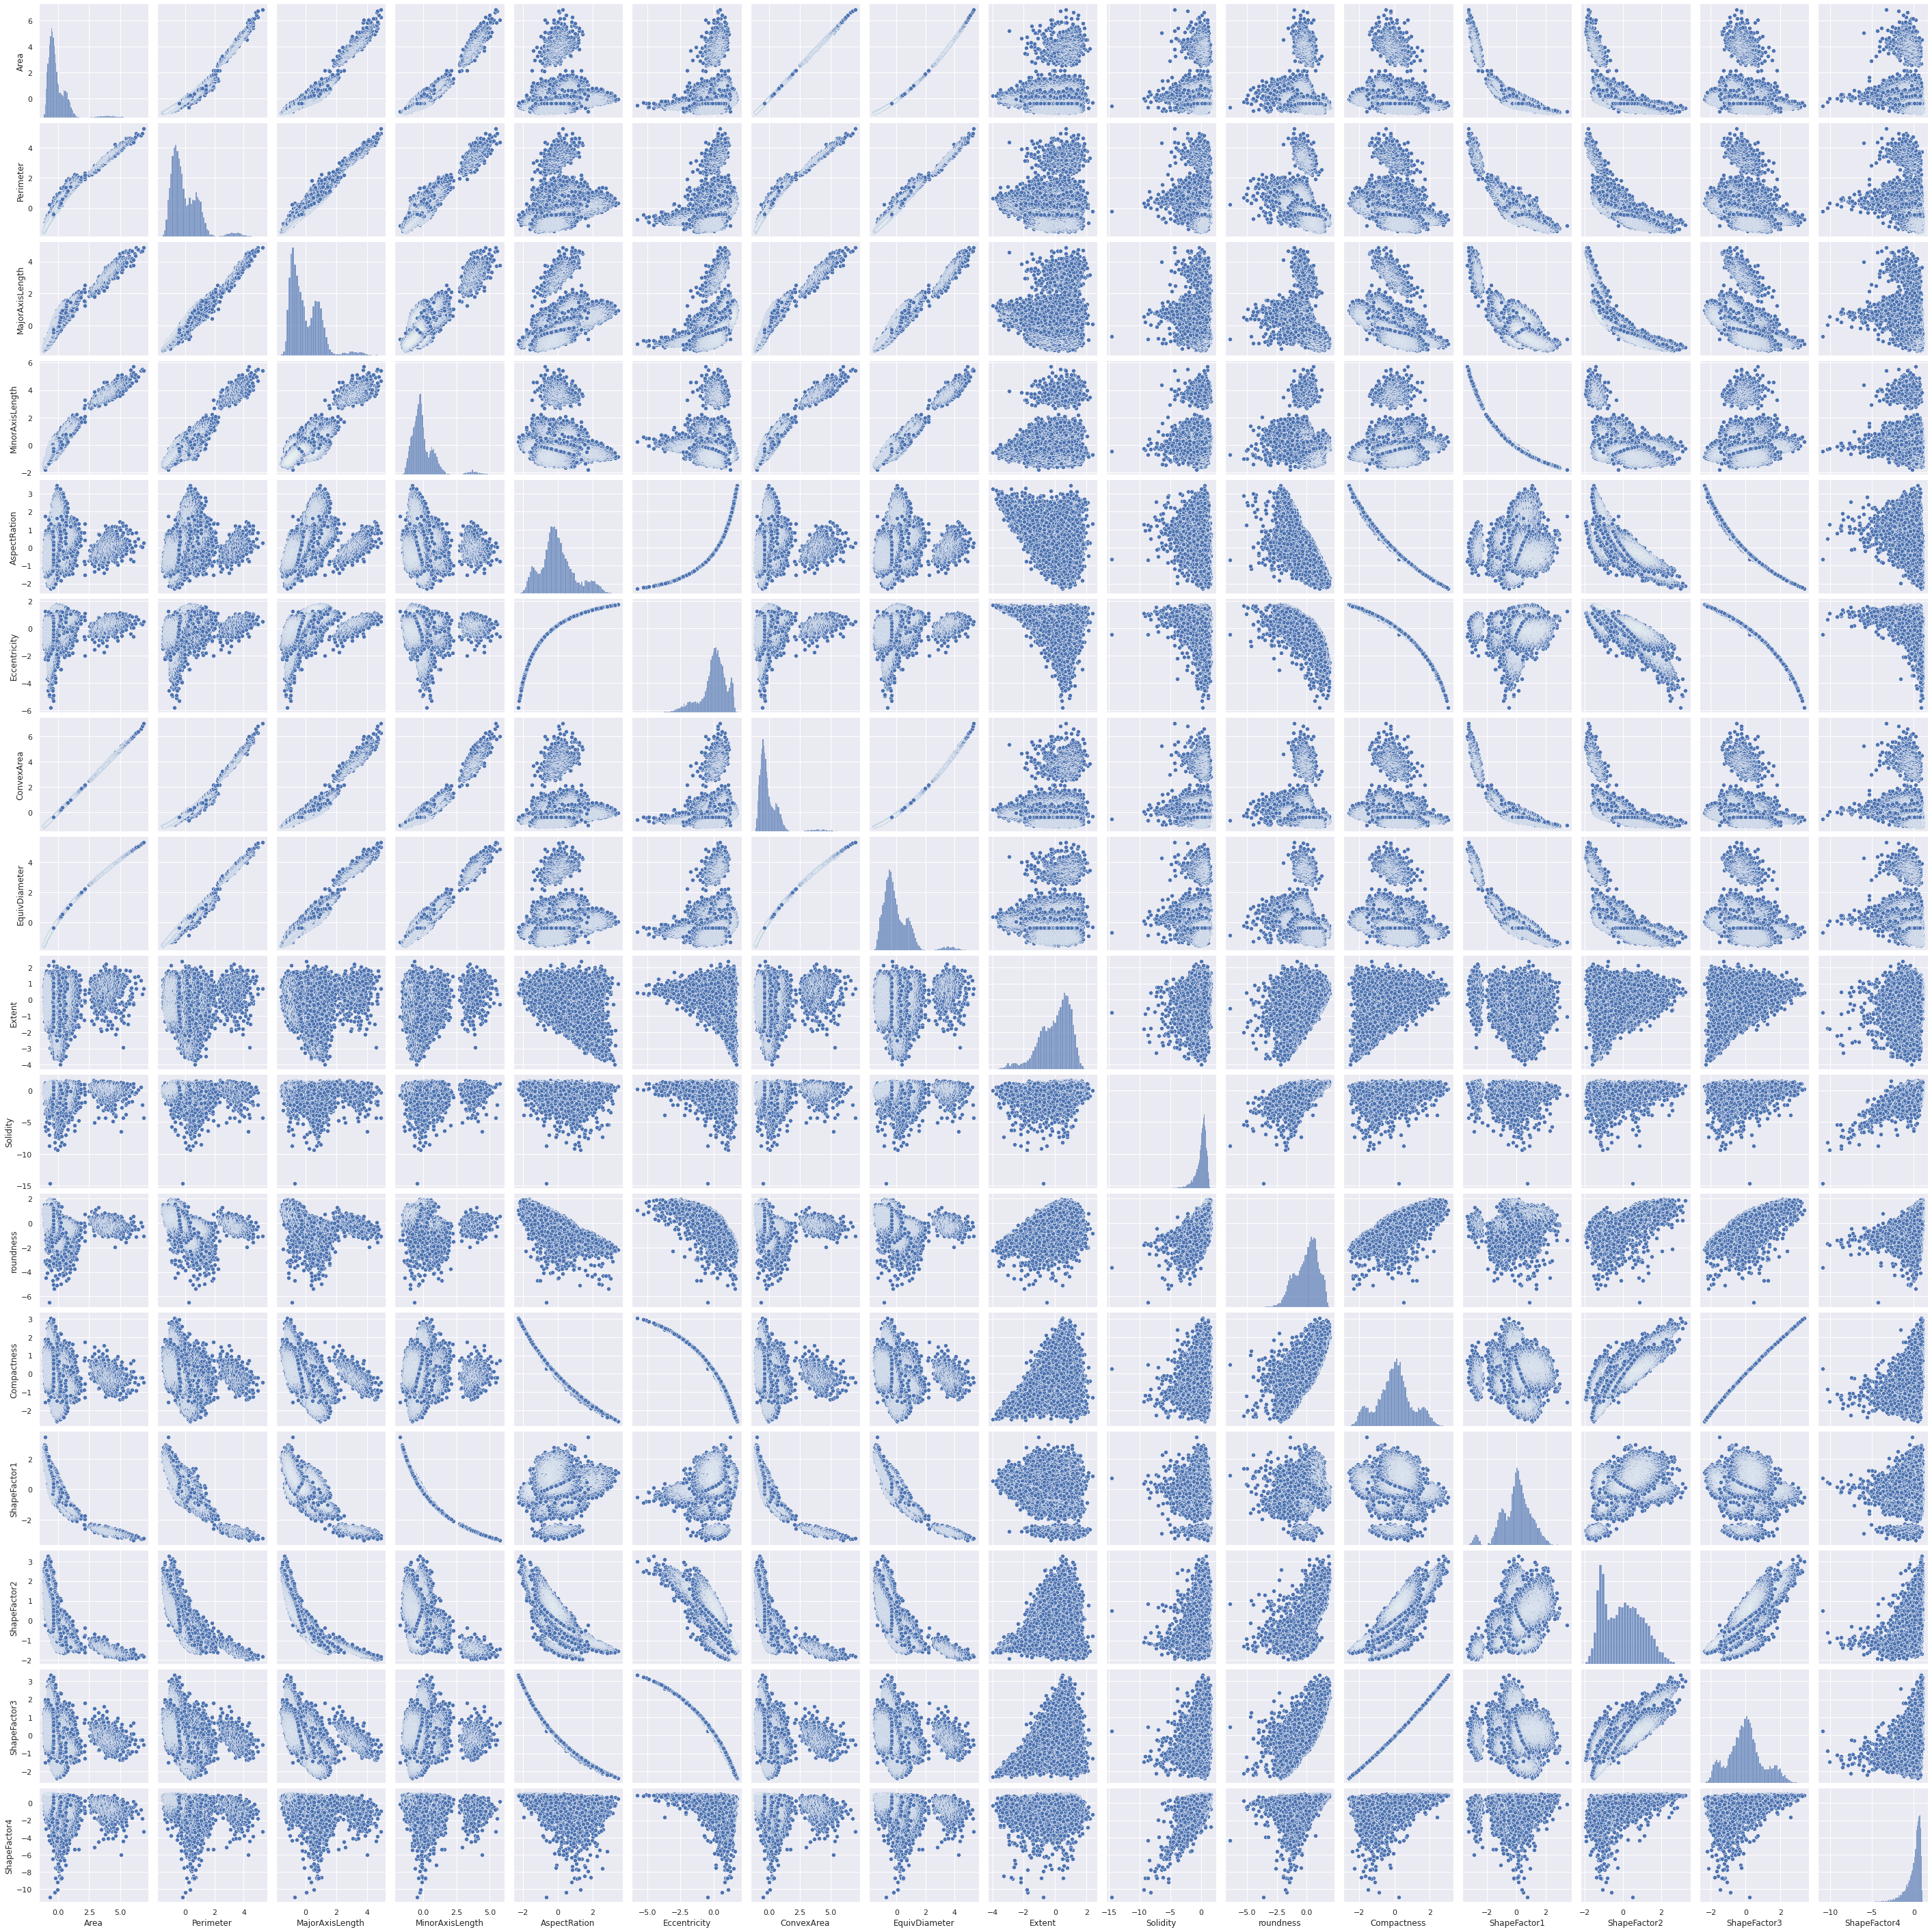

In [17]:
sns.pairplot(df)

## **Covariance**

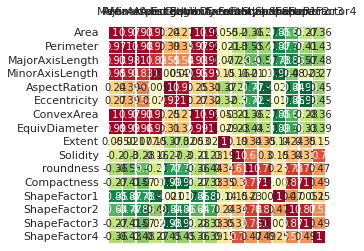

In [17]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

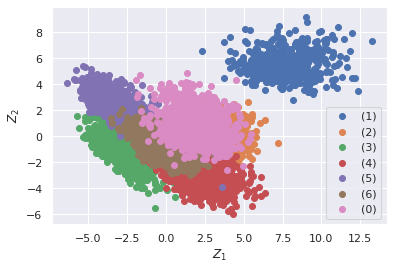

In [18]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# yes->1,  no->0, 
idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)
idx_2 = np.where(y == 2)
idx_3 = np.where(y == 3)
idx_4 = np.where(y == 4)
idx_5 = np.where(y == 5)
idx_6 = np.where(y == 6)

plt. figure()
plt.scatter(Z[idx_1,0], Z[idx_1,1], label='(1)')
plt.scatter(Z[idx_2,0], Z[idx_2,1], label='(2)')
plt.scatter(Z[idx_3,0], Z[idx_3,1],label='(3)')
plt.scatter(Z[idx_4,0], Z[idx_4,1],label='(4)')
plt.scatter(Z[idx_5,0], Z[idx_5,1],label='(5)')
plt.scatter(Z[idx_6,0], Z[idx_6,1],label='(6)')
plt.scatter(Z[idx_0,0], Z[idx_0,1],label='(0)')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

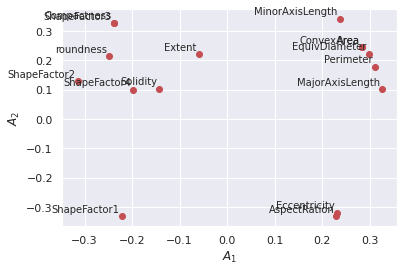

In [19]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


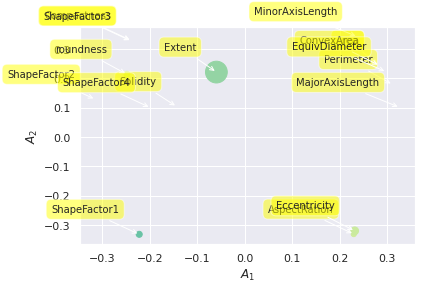

In [20]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

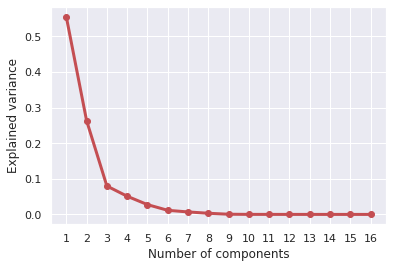

In [21]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

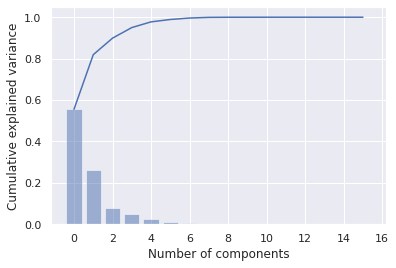

In [22]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [23]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (55.5%)',
 '1': 'PC 2 (26.4%)',
 '10': 'PC 11 (0.0%)',
 '11': 'PC 12 (0.0%)',
 '12': 'PC 13 (0.0%)',
 '13': 'PC 14 (0.0%)',
 '14': 'PC 15 (0.0%)',
 '15': 'PC 16 (0.0%)',
 '2': 'PC 3 (8.0%)',
 '3': 'PC 4 (5.1%)',
 '4': 'PC 5 (2.8%)',
 '5': 'PC 6 (1.2%)',
 '6': 'PC 7 (0.7%)',
 '7': 'PC 8 (0.3%)',
 '8': 'PC 9 (0.1%)',
 '9': 'PC 10 (0.0%)'}

### **Biplot**

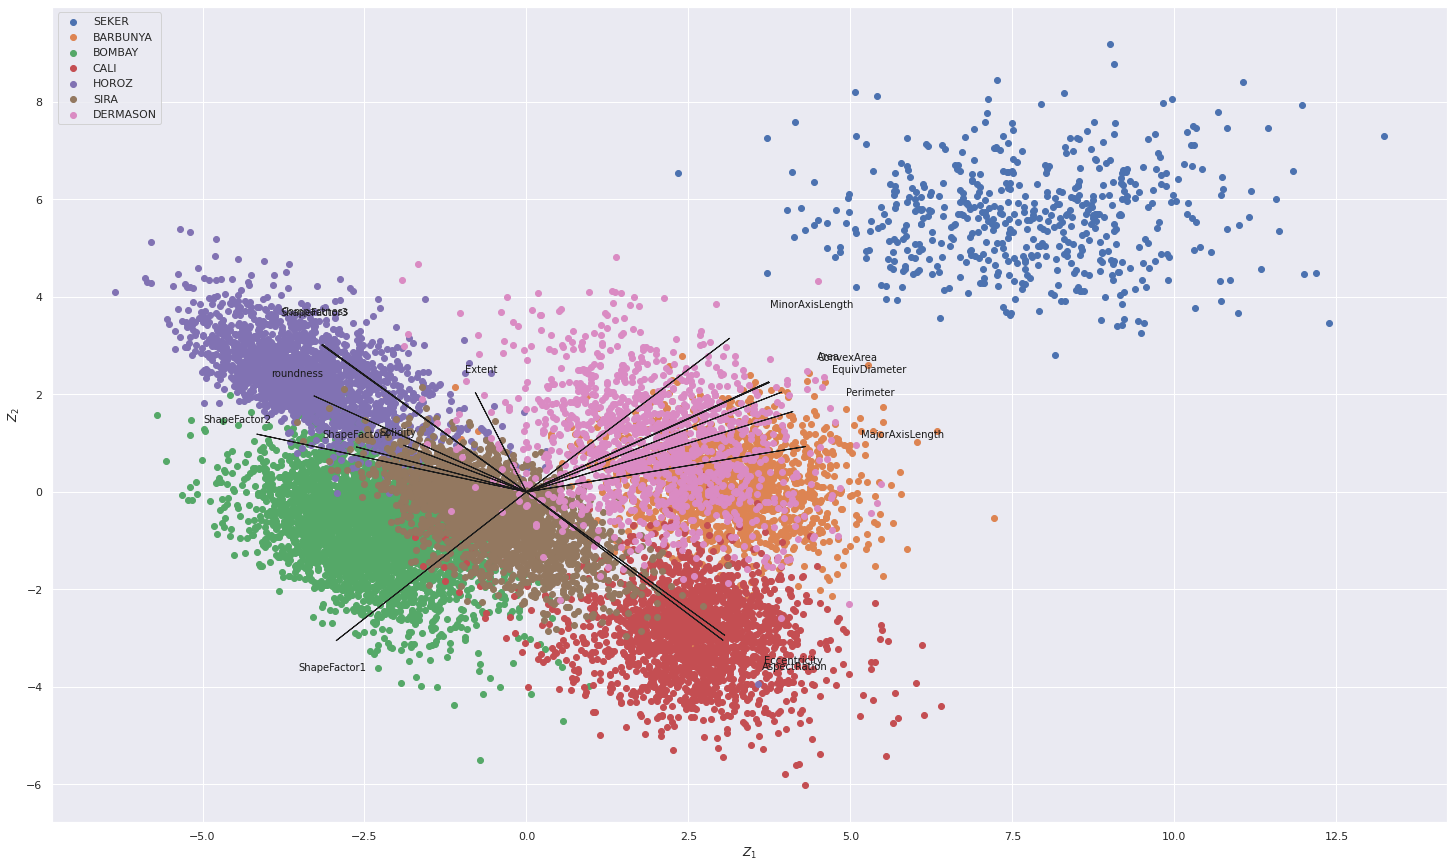

In [24]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure(figsize=(25,15))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_1,0], Z[idx_1,1], label='SEKER')
plt.scatter(Z[idx_2,0], Z[idx_2,1], label='BARBUNYA')
plt.scatter(Z[idx_3,0], Z[idx_3,1], label='BOMBAY')
plt.scatter(Z[idx_4,0], Z[idx_4,1], label='CALI')
plt.scatter(Z[idx_5,0], Z[idx_5,1], label='HOROZ')
plt.scatter(Z[idx_6,0], Z[idx_6,1], label='SIRA')
plt.scatter(Z[idx_0,0], Z[idx_0,1], label='DERMASON')


plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [ ]:
#cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), 
#               var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [25]:
!pip install pca

In [26]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [16] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [27]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

     PC          feature   loading  type
0   PC1  MajorAxisLength  0.325547  best
1   PC2  MinorAxisLength  0.342766  best
2   PC3         Solidity -0.739244  best
3   PC4           Extent  0.947261  best
4   PC1             Area  0.282520  weak
5   PC1        Perimeter  0.310728  weak
6   PC2     AspectRation -0.331065  weak
7   PC2     Eccentricity -0.319906  weak
8   PC1       ConvexArea  0.283258  weak
9   PC1    EquivDiameter  0.297455  weak
10  PC1        roundness -0.247862  weak
11  PC2      Compactness  0.329218  weak
12  PC2     ShapeFactor1 -0.331880  weak
13  PC1     ShapeFactor2 -0.314490  weak
14  PC2     ShapeFactor3  0.327859  weak
15  PC3     ShapeFactor4 -0.533864  weak


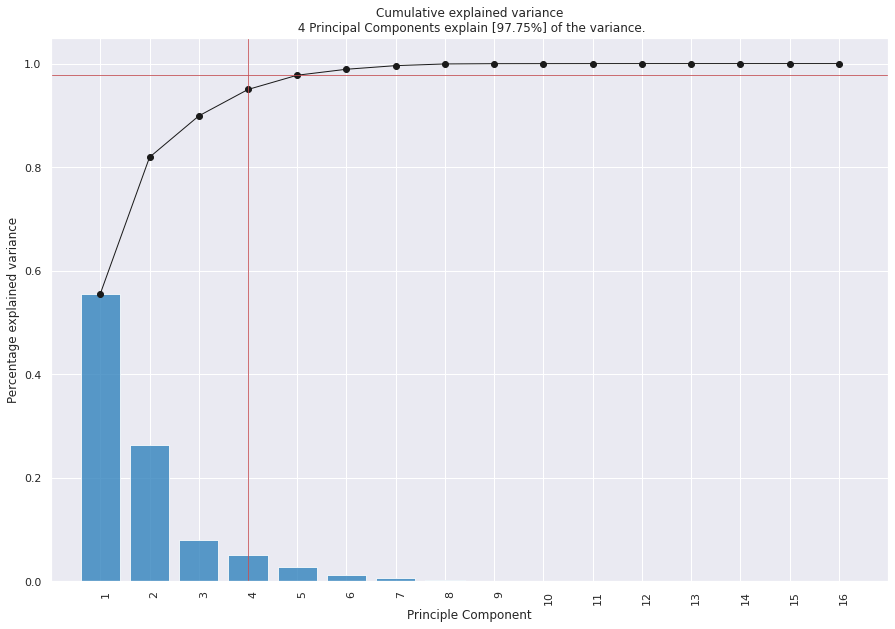

<Figure size 432x288 with 0 Axes>

In [28]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


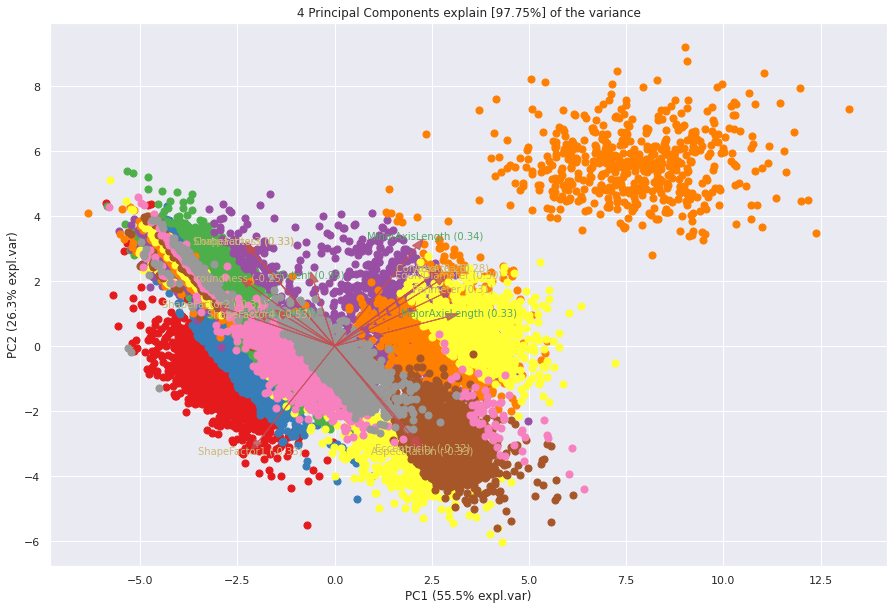

In [35]:
 ax = model.biplot(label=False, legend=False)

In [36]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8291747680> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f8291753170> (for post_execute):


KeyboardInterrupt: ignored

[pca] >Plot PC1 vs PC2 with loadings.


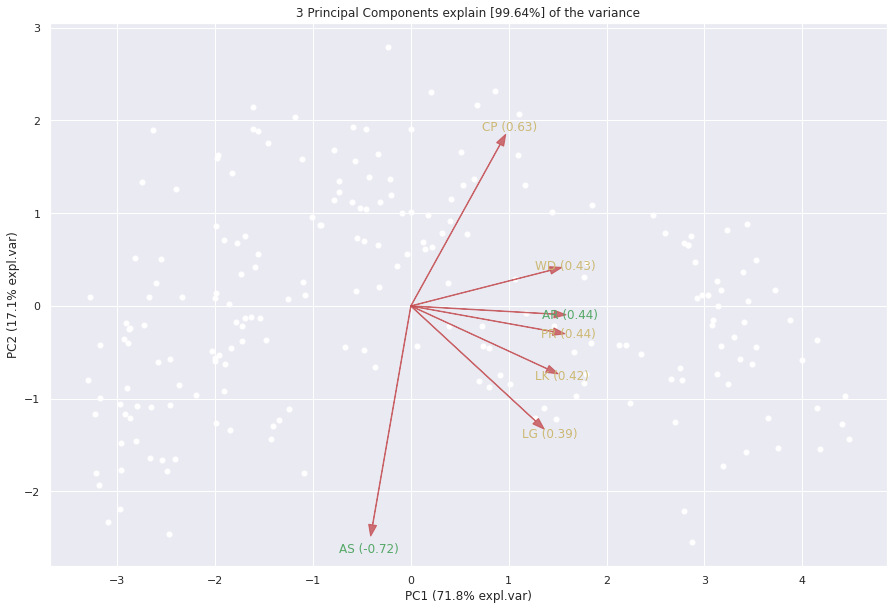

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa00b2770d0>)

In [ ]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


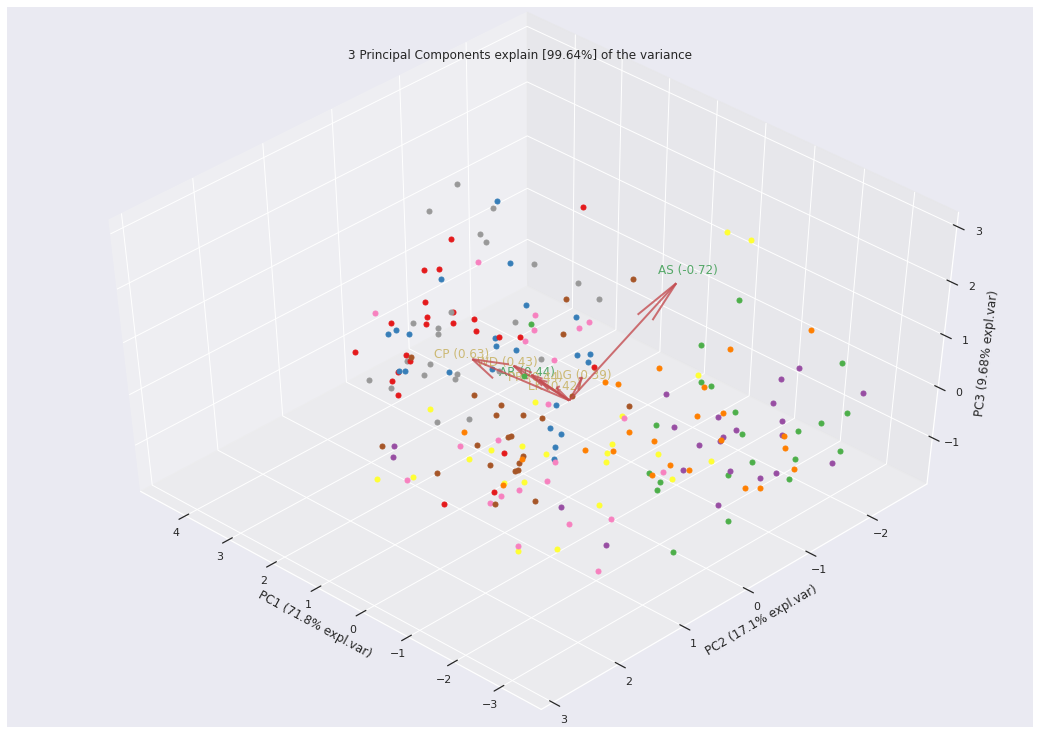

In [ ]:
ax = model.biplot3d(legend=False)

### **Principal components**

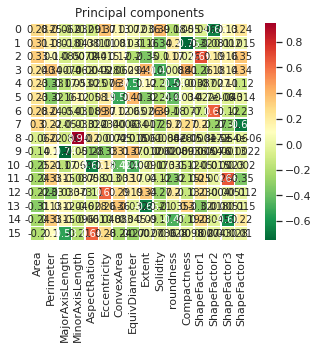

PC1:[ 0.28251975  0.31072846  0.32554676  0.23681944  0.22924686  0.23122765
  0.28325845  0.29745477 -0.05965166 -0.14314798 -0.24786185 -0.23824238
 -0.22194727 -0.31449045 -0.23881184 -0.19847095]
PC2:[ 0.24554831  0.17932251  0.1012622   0.34276635 -0.33106536 -0.3199065
  0.24429307  0.22257357  0.22181401  0.10405185  0.21423127  0.32921806
 -0.33187969  0.12894216  0.32785851  0.10037378]


In [29]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

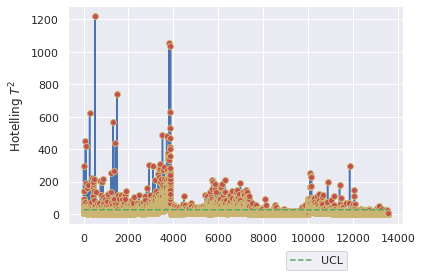

In [30]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [31]:
print(np.argwhere(Tsquare>UCL))

[[    0]
 [    1]
 [    3]
 ...
 [13092]
 [13166]
 [13278]]


### **Control Charts for Principal Components**

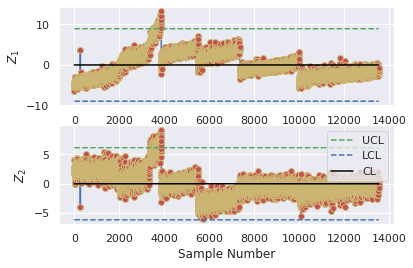

In [32]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [33]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[3505]
 [3538]
 [3541]
 [3547]
 [3572]
 [3603]
 [3605]
 [3622]
 [3636]
 [3653]
 [3655]
 [3656]
 [3657]
 [3662]
 [3663]
 [3666]
 [3676]
 [3678]
 [3682]
 [3683]
 [3686]
 [3687]
 [3689]
 [3694]
 [3698]
 [3707]
 [3710]
 [3717]
 [3723]
 [3734]
 [3735]
 [3737]
 [3745]
 [3747]
 [3751]
 [3753]
 [3754]
 [3758]
 [3760]
 [3763]
 [3764]
 [3765]
 [3768]
 [3771]
 [3772]
 [3774]
 [3776]
 [3780]
 [3781]
 [3782]
 [3784]
 [3786]
 [3787]
 [3790]
 [3791]
 [3793]
 [3794]
 [3795]
 [3797]
 [3798]
 [3799]
 [3800]
 [3803]
 [3805]
 [3807]
 [3809]
 [3810]
 [3811]
 [3813]
 [3814]
 [3816]
 [3817]
 [3818]
 [3819]
 [3821]
 [3823]
 [3824]
 [3825]
 [3826]
 [3827]
 [3828]
 [3829]
 [3830]
 [3831]
 [3832]
 [3833]
 [3834]
 [3835]
 [3836]
 [3837]
 [3838]
 [3839]
 [3840]
 [3841]
 [3842]
 [3843]
 [3844]
 [3845]
 [3846]
 [3847]
 [3848]
 [3849]
 [3850]
 [3851]
 [3852]
 [3853]
 [3854]
 [3855]
 [3856]
 [3857]
 [3858]
 [3859]
 [3860]
 [3861]
 [3862]
 [3863]
 [3864]
 [3865]
 [3866]
 [3867]
 [3868]
 [3869]
 [3870]]
[]
[[3350]
 

## **Multi-Class Classification**

0.10037377655179594

In [34]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, target, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], target, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 9480
Test Dataset Size: 4063


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.850     0.811     0.830       392
           1      0.985     1.000     0.993       134
           2      0.880     0.894     0.887       508
           3      0.927     0.882     0.904      1072
           4      0.942     0.954     0.948       564
           5      0.914     0.934     0.924       578
           6      0.829     0.869     0.848       815

    accuracy                          0.895      4063
   macro avg      0.904     0.906     0.905      4063
weighted avg      0.896     0.895     0.895      4063



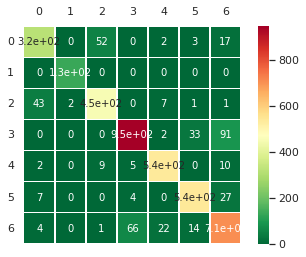

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.899     0.796     0.844       392
           1      0.957     1.000     0.978       134
           2      0.894     0.927     0.910       508
           3      0.951     0.756     0.842      1072
           4      0.912     0.938     0.925       564
           5      0.950     0.917     0.933       578
           6      0.711     0.924     0.804       815

    accuracy                          0.871      4063
   macro avg      0.896     0.894     0.891      4063
weighted avg      0.885     0.871     0.872      4063



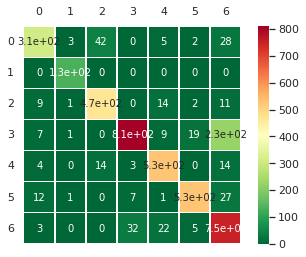

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.755     0.574     0.652       392
           1      1.000     1.000     1.000       134
           2      0.760     0.815     0.786       508
           3      0.888     0.891     0.890      1072
           4      0.899     0.950     0.924       564
           5      0.919     0.917     0.918       578
           6      0.813     0.836     0.824       815

    accuracy                          0.855      4063
   macro avg      0.862     0.855     0.856      4063
weighted avg      0.854     0.855     0.853      4063



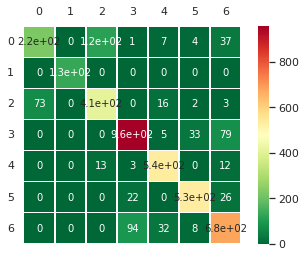

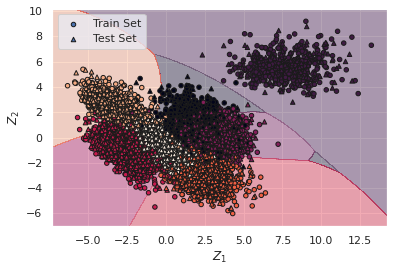

(array([   0,   29,   34,   40,   49,   71,   76,   77,   99,  110,  122,
        137,  139,  163,  185,  191,  220,  240,  242,  246,  264,  283,
        285,  286,  290,  292,  293,  296,  300,  306,  312,  314,  318,
        324,  328,  349,  353,  358,  360,  361,  368,  370,  373,  388,
        393,  394,  397,  407,  410,  416,  426,  429,  435,  439,  441,
        446,  453,  469,  484,  488,  500,  526,  532,  533,  537,  541,
        546,  552,  563,  564,  569,  572,  574,  575,  577,  578,  581,
        587,  594,  597,  598,  617,  622,  631,  635,  637,  648,  658,
        663,  666,  672,  694,  706,  707,  711,  716,  729,  732,  742,
        745,  750,  761,  764,  784,  785,  786,  789,  790,  804,  812,
        822,  832,  838,  846,  854,  863,  864,  876,  884,  894,  899,
        900,  905,  924,  944,  958,  963,  972,  984,  988,  996,  998,
       1003, 1010, 1013, 1030, 1049, 1065, 1086, 1093, 1097, 1109, 1118,
       1141, 1142, 1150, 1156, 1172, 1174, 1181, 1

In [35]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 32}
k_Z: {'n_neighbors': 32}
k_Z12: {'n_neighbors': 32}
                                    0         1         2         3         4
knn_full_data fit_time       0.003577  0.003491  0.003446  0.003447  0.003416
knn_Z  fit_time              0.001642  0.001708  0.001833  0.001669  0.001673
knn_Z12 fit_time             0.004007  0.003922  0.003878  0.003899  0.003976
knn_full_data test_f1_macro  0.945997  0.922958  0.925431  0.941662  0.931288
knn_Z  test_f1_macro         0.945997  0.922958  0.925431  0.941662  0.931288
knn_Z12 test_f1_macro        0.856752  0.856338  0.862249  0.873027  0.858177

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.944     0.852     0.895       392
           1      1.000     1.000     1.000       134
           2      0.909     0.967     0.937       508
           3      0.921     0.928     0.925      1072
           4      0.969     0.943 

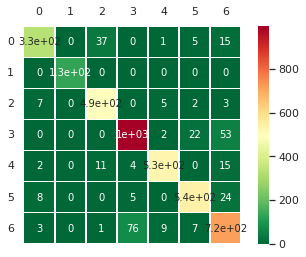

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.944     0.852     0.895       392
           1      1.000     1.000     1.000       134
           2      0.909     0.967     0.937       508
           3      0.921     0.928     0.925      1072
           4      0.969     0.943     0.956       564
           5      0.938     0.936     0.937       578
           6      0.867     0.882     0.875       815

    accuracy                          0.922      4063
   macro avg      0.935     0.930     0.932      4063
weighted avg      0.923     0.922     0.922      4063



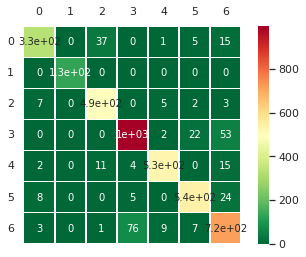

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.734     0.656     0.693       392
           1      1.000     1.000     1.000       134
           2      0.776     0.789     0.782       508
           3      0.906     0.937     0.921      1072
           4      0.933     0.938     0.935       564
           5      0.920     0.936     0.928       578
           6      0.860     0.843     0.851       815

    accuracy                          0.874      4063
   macro avg      0.876     0.871     0.873      4063
weighted avg      0.873     0.874     0.873      4063



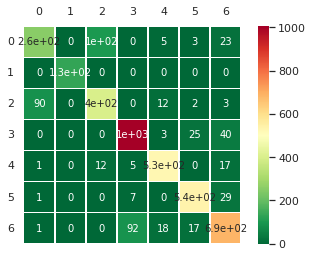

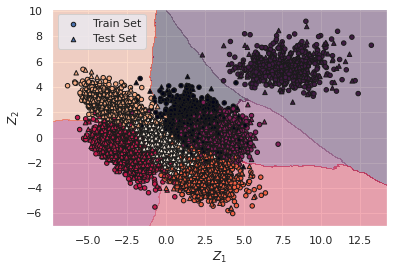

In [36]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 8}
depth_Z: {'max_depth': 8}
depth_Z12: {'max_depth': 8}
                                   0         1         2         3         4
dt_full_data fit_time       0.121127  0.124141  0.121410  0.120349  0.125078
dt_Z  fit_time              0.120498  0.129813  0.121290  0.123754  0.122501
dt_Z12 fit_time             0.015958  0.016793  0.016301  0.015758  0.016049
dt_full_data test_f1_macro  0.921240  0.911168  0.922129  0.930016  0.917397
dt_Z  test_f1_macro         0.924353  0.906026  0.906406  0.922531  0.907613
dt_Z12 test_f1_macro        0.836788  0.839181  0.847356  0.858723  0.853562

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.910     0.880     0.895       392
           1      1.000     0.985     0.992       134
           2      0.909     0.929     0.919       508
           3      0.898     0.905     0.901      1072
           4      0.952     0.920     

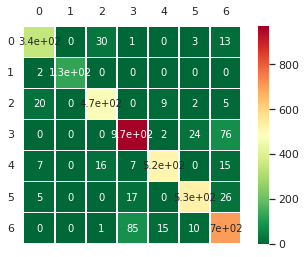

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.920     0.821     0.868       392
           1      1.000     0.985     0.992       134
           2      0.871     0.959     0.913       508
           3      0.920     0.904     0.912      1072
           4      0.952     0.940     0.946       564
           5      0.917     0.936     0.926       578
           6      0.852     0.859     0.855       815

    accuracy                          0.906      4063
   macro avg      0.919     0.915     0.916      4063
weighted avg      0.907     0.906     0.906      4063



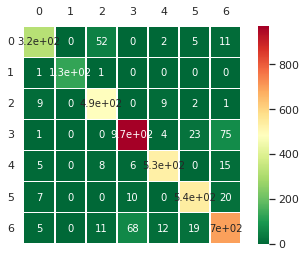

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.741     0.490     0.590       392
           1      1.000     0.985     0.992       134
           2      0.712     0.874     0.784       508
           3      0.886     0.924     0.904      1072
           4      0.923     0.931     0.927       564
           5      0.927     0.919     0.923       578
           6      0.849     0.821     0.835       815

    accuracy                          0.857      4063
   macro avg      0.862     0.849     0.851      4063
weighted avg      0.857     0.857     0.854      4063



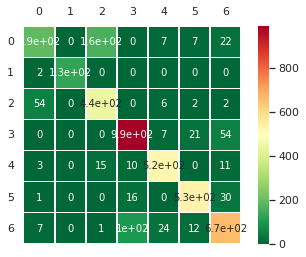

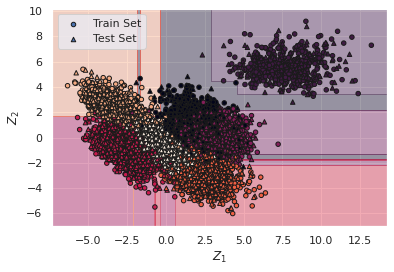

In [37]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA


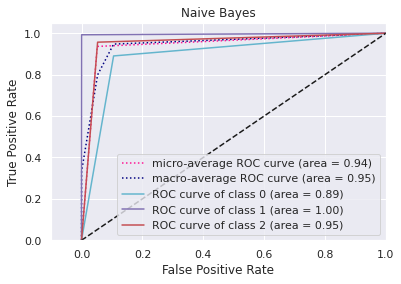

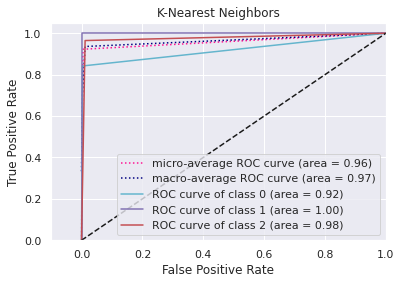

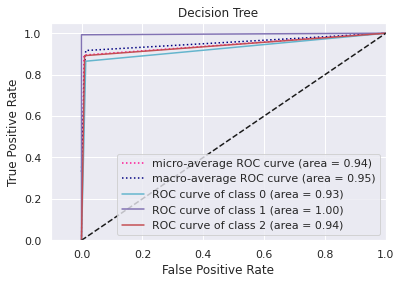

DATASET: Z


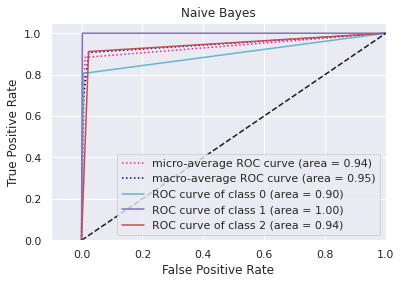

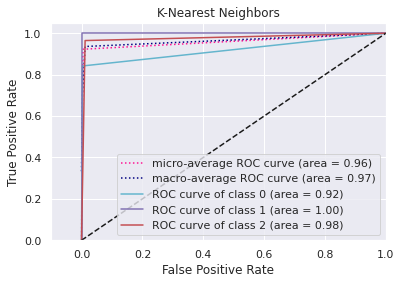

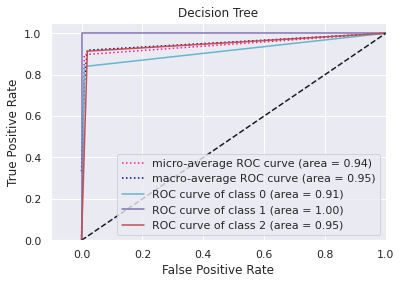

DATASET: Z12


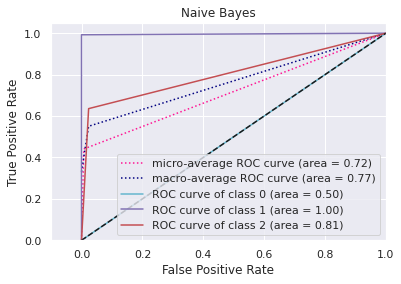

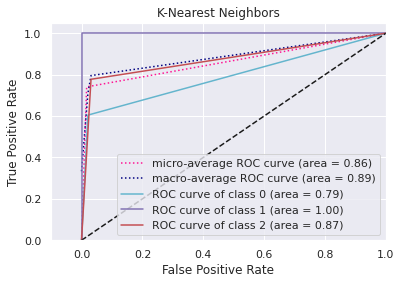

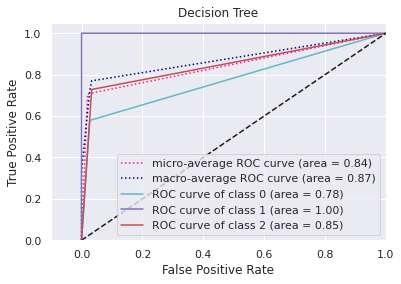

In [38]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

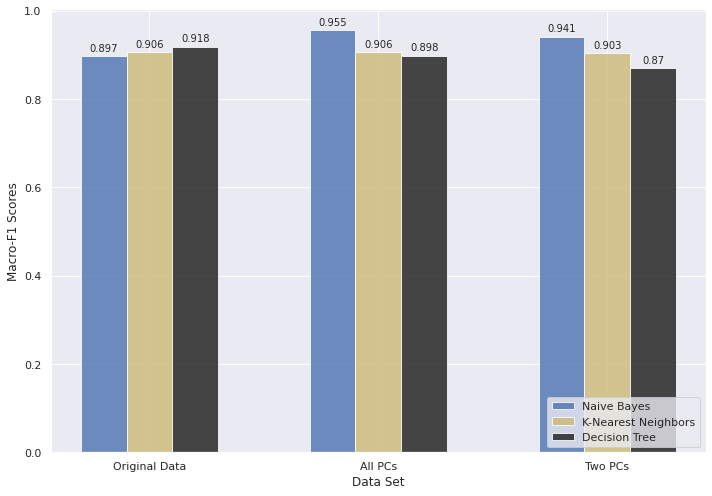

In [39]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()